In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

def rr(burst_times, tq):
    """
    Standard Round Robin with fixed time quantum tq.
    Returns (Avg Waiting Time, Avg Turnaround Time, Num of Context Switches).
    """
    n = len(burst_times)
    bursts = list(burst_times)

    time = 0
    completion = [0]*n
    prev_pid = None
    context_switches = 0

    ready = [(pid, bt) for pid, bt in enumerate(bursts)]

    while ready:
        pid, rem = ready.pop(0)

        if prev_pid is not None and prev_pid != pid:
            context_switches += 1
        prev_pid = pid

        if rem > tq:
            # run for one full quantum
            time += tq
            rem -= tq
            # put back in ready with reduced remaining time
            ready.append((pid, rem))
        else:
            # runs to completion
            time += rem
            completion[pid] = time

    wait = [completion[i]-bursts[i] for i in range(n)]
    turn = [completion[i] for i in range(n)]
    avg_wait = sum(wait) / n
    avg_turn = sum(turn) / n

    return avg_wait, avg_turn, context_switches

def mmrr(burst_times):
    """
    Mean Median Round Robin.
    Returns (Avg Waiting Time, Avg Turnaround Time, Num of Context Switches).
    """
    n = len(burst_times)
    bursts = list(burst_times)
    tasks = sorted(enumerate(bursts), key=lambda x: x[1])

    median = stats.median(bursts)
    mean = stats.mean(bursts)
    tq = int((median + mean) / 2)
    if tq < 1:
        tq = 1

    time = 0
    completion = [0]*n
    prev_pid = None
    context_switches = 0

    ready = [(pid, bt) for pid, bt in tasks]

    while ready:
        pid, rem = ready.pop(0)

        if prev_pid is not None and prev_pid != pid:
            context_switches += 1
        prev_pid = pid

        if rem > tq: # using full quantum instead of half quantum
            # run for one full quantum
            time += tq
            rem -= tq
            # if remaining is small, finish the step immediately
            if rem < tq*0.5:
                time += rem
                completion[pid] = time
            else:
                # else, put back in ready with reduced remaining time
                ready.append((pid, rem))
        else:
            # else, runs to completion
            time += rem
            completion[pid] = time
            
    wait = [completion[i]-bursts[i] for i in range(n)]
    turn = [completion[i] for i in range(n)]
    avg_wait = sum(wait) / n
    avg_turn = sum(turn) / n

    return avg_wait, avg_turn, context_switches


def mmmrr(burst_times):
    """
    Modified Mean Median Round Robin.
    Returns (Avg Waiting Time, Avg Turnaround Time, Num of Context Switches).
    """
    n = len(burst_times)
    bursts = list(burst_times)
    tasks = sorted(enumerate(bursts), key=lambda x: x[1])

    median = stats.median(bursts)
    mean = stats.mean(bursts)
    tq = int((median + mean) / 2)
    if tq < 1:
        tq = 1

    time = 0
    completion = [0]*n
    prev_pid = None
    context_switches = 0
    
    ready = [(pid, bt) for pid, bt in tasks]

    while ready:
        pid, rem = ready.pop(0)

        if prev_pid is not None and prev_pid != pid:
            context_switches += 1
        prev_pid = pid

        if rem > tq:
            # run for one full quantum
            time += tq
            rem -= tq
            # if remaining is small, finish the step immediately
            if rem < tq: # using full quantum instead of half quantum
                time += rem
                completion[pid] = time
            else:
                # else, put back in ready with reduced remaining time
                ready.append((pid, rem))
        else:
            # else, runs to completion
            time += rem
            completion[pid] = time
            
    wait = [completion[i]-bursts[i] for i in range(n)]
    turn = [completion[i] for i in range(n)]
    avg_wait = sum(wait) / n
    avg_turn = sum(turn) / n

    return avg_wait, avg_turn, context_switches



cases = [
  [42,68,135,101,170,125,79,159,163,65,106,146,82,28,162],
  [35,40,55,60,75,80,94,101,112,121,125,134,140,180,197],
  [250,186,174,163,146,140,132,114,100,97,88,37,20,18,12],
]

labels = ['Case 1', 'Case 2', 'Case 3']

rr_awt, rr_att, rr_cs = [], [], []
mmrr_awt, mmrr_att, mmrr_cs = [], [], []
mmmrr_awt, mmmrr_att, mmmrr_cs = [], [], []

for bursts in cases:
    w, t, c = rr(bursts, 35) # using tq=35
    rr_awt.append(w); rr_att.append(t); rr_cs.append(c)
    w, t, c = mmrr(bursts)
    mmrr_awt.append(w); mmrr_att.append(t); mmrr_cs.append(c)
    w, t, c = mmmrr(bursts)
    mmmrr_awt.append(w); mmmrr_att.append(t); mmmrr_cs.append(c)


In [2]:
print("Average Waiting Times (ms):")
for i, lbl in enumerate(labels):
    print(f"{lbl}: RR={rr_awt[i]:7.2f}, MMRR={mmrr_awt[i]:7.2f}, MMMRR={mmmrr_awt[i]:7.2f}")

print("\nAverage Turnaround Times (ms):")
for i, lbl in enumerate(labels):
    print(f"{lbl}: RR={rr_att[i]:7.2f}, MMRR={mmrr_att[i]:7.2f}, MMMRR={mmmrr_att[i]:7.2f}")

print("\nNumber of Context Switches:")
for i, lbl in enumerate(labels):
    print(f"{lbl}: RR={rr_cs[i]}, MMRR={mmrr_cs[i]}, MMMRR={mmmrr_cs[i]}")

Average Waiting Times (ms):
Case 1: RR=1091.00, MMRR= 589.20, MMMRR= 567.80
Case 2: RR= 920.87, MMRR= 533.33, MMMRR= 526.53
Case 3: RR=1100.13, MMRR= 522.33, MMMRR= 499.93

Average Turnaround Times (ms):
Case 1: RR=1199.73, MMRR= 697.93, MMMRR= 676.53
Case 2: RR=1024.13, MMRR= 636.60, MMMRR= 629.80
Case 3: RR=1211.93, MMRR= 634.13, MMMRR= 611.73

Number of Context Switches:
Case 1: RR=52, MMRR=17, MMMRR=14
Case 2: RR=50, MMRR=16, MMMRR=14
Case 3: RR=53, MMRR=17, MMMRR=14


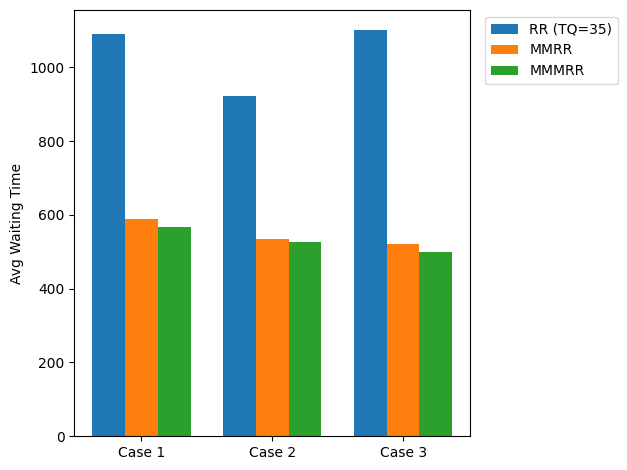

In [3]:
# --- Waiting Times plot ---
x = range(len(cases))
width = 0.25
fig1, ax1 = plt.subplots()
ax1.bar([i-width for i in x], rr_awt, width, label='RR (TQ=35)')
ax1.bar( x, mmrr_awt, width, label='MMRR')
ax1.bar([i+width for i in x], mmmrr_awt, width, label='MMMRR')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel('Avg Waiting Time')
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

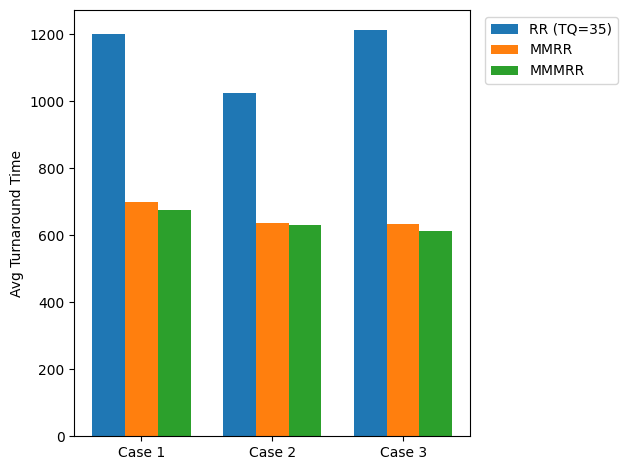

In [4]:
# --- Turnaround Times plot ---
x = range(len(cases))
width = 0.25
fig2, ax2 = plt.subplots()
ax2.bar([i-width for i in x], rr_att, width, label='RR (TQ=35)')
ax2.bar( x, mmrr_att, width, label='MMRR')
ax2.bar([i+width for i in x], mmmrr_att, width, label='MMMRR')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel('Avg Turnaround Time')
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

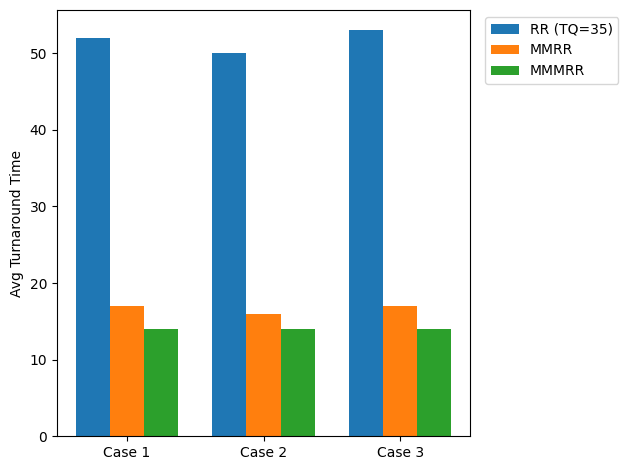

In [5]:
# --- Context Switches plot ---
x = range(len(cases))
width = 0.25
fig3, ax3 = plt.subplots()
ax3.bar([i-width for i in x], rr_cs, width, label='RR (TQ=35)')
ax3.bar( x, mmrr_cs, width, label='MMRR')
ax3.bar([i+width for i in x], mmmrr_cs, width, label='MMMRR')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.set_ylabel('Avg Turnaround Time')
ax3.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()